# Sahayog Sync – AI-driven Mutual Aid Allocation (MVP Demo)

This demo shows how an AI system models village kinship networks
and allocates resources fairly during a flood scenario.

In [19]:
import pandas as pd
import numpy as np
import networkx as nx
import json
import matplotlib.pyplot as plt

In [20]:
households = pd.read_csv("../ml-python/data/processed/households_processed.csv")
edges = pd.read_csv("../ml-python/data/processed/edges_processed.csv")

with open("../ml-python/data/processed/flood_scenario_processed.json") as f:
    flood = json.load(f)

alloc_df = pd.read_csv("../outputs/allocations/allocations_demo.csv")

In [21]:
G = nx.Graph()

for _, row in households.iterrows():
    G.add_node(row['id'], **row.to_dict())

for _, row in edges.iterrows():
    G.add_edge(
        row['from_id'],
        row['to_id'],
        tie_strength=row['tie_strength'],
        physical_proximity=row['physical_proximity']
    )

In [22]:
for h in flood['affected_households']:
    G.nodes[h['id']]['affected'] = 1
    G.nodes[h['id']]['severity'] = h['severity']

In [23]:
alloc_df.head()

,from,to,food_allocated,tie_strength
0,H183,H3,0.6,0.700000
1,H275,H10,0.4,0.800000
2,H276,H11,0.8,0.683333
3,H217,H57,0.6,0.766667
4,H233,H60,0.4,0.800000


In [24]:
affected = [n for n, d in G.nodes(data=True) if d['affected'] == 1]
covered = alloc_df['to'].unique()

print(f"Affected households: {len(affected)}")
print(f"Covered households: {len(covered)}")
print(f"Coverage ratio: {len(covered)/len(affected):.2f}")

Affected households: 100
Covered households: 95
Coverage ratio: 0.95


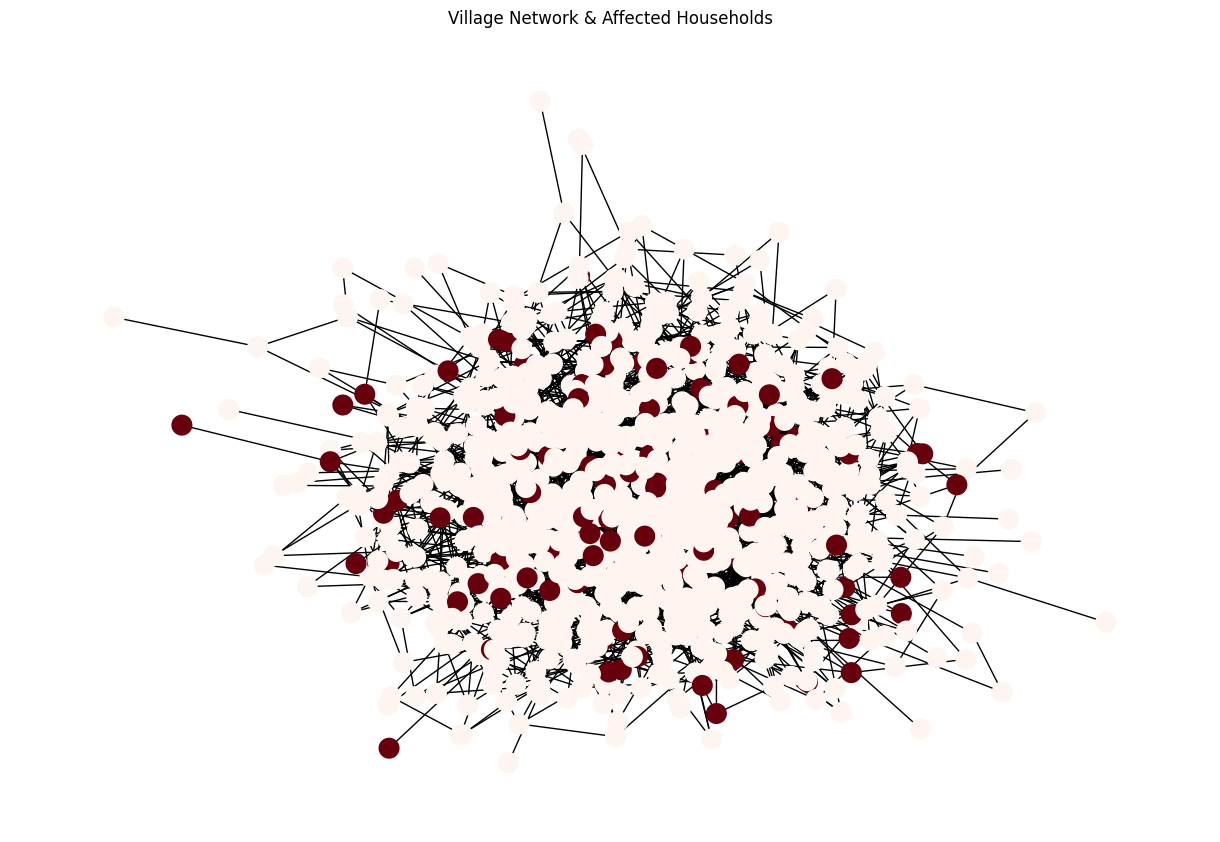

In [32]:
plt.figure(figsize=(12,8))
nx.draw(
    G,
    node_size=200,
    node_color=[G.nodes[n]['affected'] for n in G.nodes()],
    cmap=plt.cm.Reds,
    with_labels=False
)
# plt.savefig("../outputs/visualizations/allocation_graph.png")
plt.title("Village Network & Affected Households")
plt.show()

In [29]:
alloc_df.to_csv("../outputs/allocations/allocations_demo.csv", index=False)